# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Data Loading


In [3]:
df = pd.read_csv('data/Bengaluru_House_Data_cleaned.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6892 entries, 0 to 6891
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   location       6892 non-null   object 
 1   total_sqft     6892 non-null   float64
 2   bath           6892 non-null   float64
 3   balcony        6892 non-null   float64
 4   price          6892 non-null   float64
 5   bhk            6892 non-null   int64  
 6   ready_to_move  6892 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 377.0+ KB


In [5]:
df.ready_to_move = df.ready_to_move.astype('object')

# Numerical Features

In [6]:
df.describe()

,total_sqft,bath,balcony,price,bhk
count,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000
mean,1482.401011,2.424840,1.560795,98.440105,2.497388
std,834.101119,0.953426,0.789527,89.576693,0.924752
min,300.000000,1.000000,0.000000,10.000000,1.000000
25%,1092.000000,2.000000,1.000000,50.841250,2.000000
50%,1260.000000,2.000000,2.000000,74.760000,2.000000
75%,1670.000000,3.000000,2.000000,112.000000,3.000000
max,30000.000000,16.000000,3.000000,2200.000000,16.000000


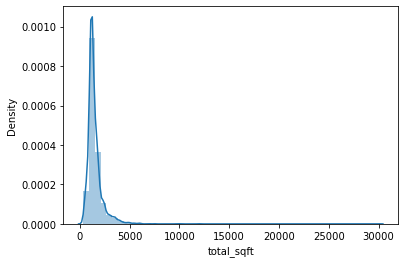

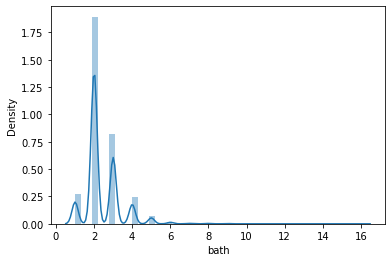

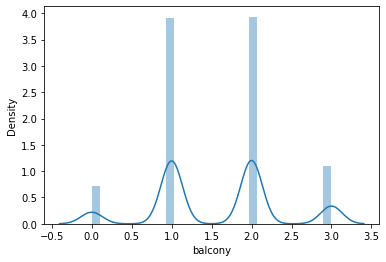

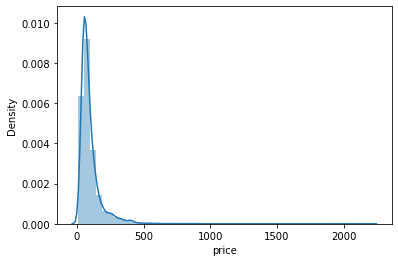

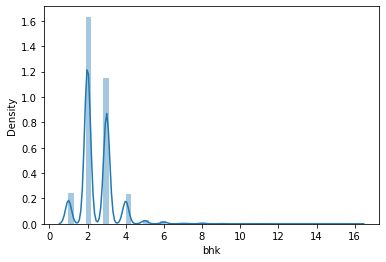

In [7]:
df_numerical = df.select_dtypes(exclude=['object'])
for feature in df_numerical:
    sns.distplot(df[feature])
    plt.show()

# Finding correlation between numerical features 

<AxesSubplot:>

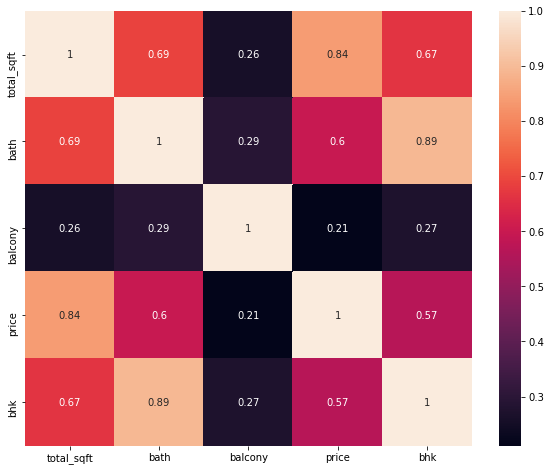

In [8]:
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

# From the heatmap we can see that:-
 - strong positive correlation between 'total_sqft' and 'bath'
 - 'bhk' and 'bath' are highly correlated
 - 'hbk' and 'bath' also show positive correlation to 'price', might suggest that higher price with higher number of rooms and bathrooms

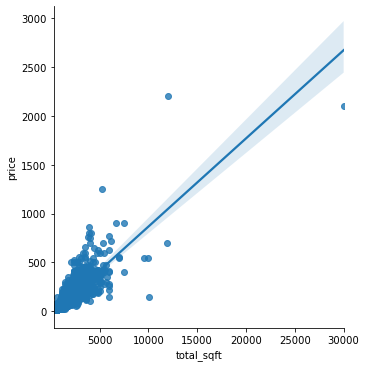

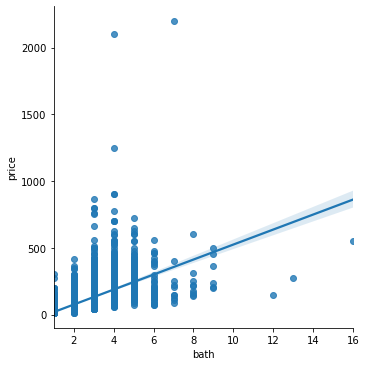

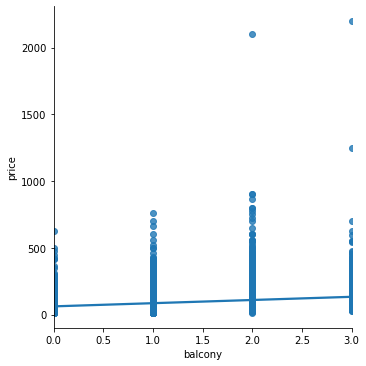

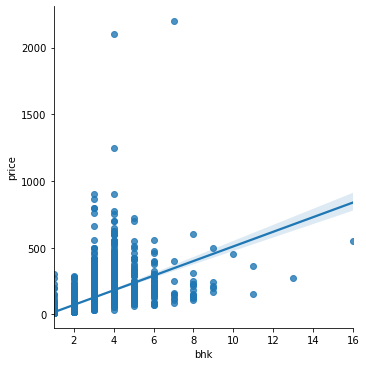

In [9]:
#lmplot : linear model plot
df_numerical_features = df_numerical.drop(['price'],axis=1)
for col in df_numerical_features:
    sns.lmplot(x=col,y='price',data=df)

From the plots:
 - as the total square feet, number of bathroom, and number of room increases, th eprice increases
 - as the number of balcony increases, the selling price increases by an insigficant amount

# Categorical Features

In [10]:
df_cat_features = df[['location','ready_to_move']]

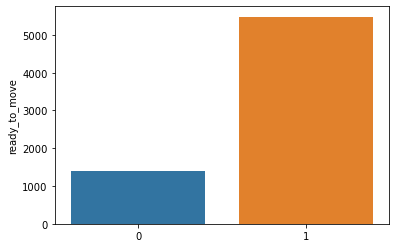

In [11]:
df_cat_features_wo_location = df_cat_features.drop(['location'], axis = 1)
for col in df_cat_features_wo_location.columns:
    cat_num = df_cat_features_wo_location[col].value_counts()
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels())
    plt.show()

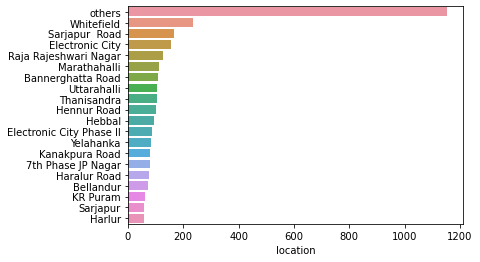

In [12]:
location_num = df_cat_features['location'].value_counts()[:20]
chart = sns.barplot(x = location_num, y = location_num.index)
plt.show()

# Top 20 locations with highest price 

In [13]:
pd.pivot_table(df, index = ['location'], values = 'price').sort_values('price', ascending = False)[:20]


,price
location,
Cunningham Road,744.555556
Giri Nagar,402.428571
HAL 2nd Stage,361.250000
Benson Town,320.000000
Rajaji Nagar,304.041667
1st Block Jayanagar,273.714286
Cooke Town,271.111111
Malleshwaram,269.351429
Kodihalli,265.333333


# Top 20 locations with lowest price 

In [14]:
pd.pivot_table(df, index = ['location'], values = 'price').sort_values('price', ascending = True)[:20]

,price
location,
Ananth Nagar,28.568333
Attibele,28.958929
Chandapura,29.238265
Bommasandra Industrial Area,32.679231
Kereguddadahalli,32.950000
Vishwapriya Layout,33.250000
Anekal,33.604000
Kammasandra,34.423500
Dommasandra,40.134000


# 'ready_to_move' 

In [15]:
ready_to_move_price = df.groupby('ready_to_move')['price'].mean()
ready_to_move_price

ready_to_move
0     90.855408
1    100.389191
Name: price, dtype: float64

<AxesSubplot:xlabel='ready_to_move', ylabel='price'>

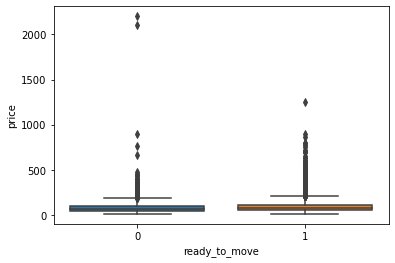

In [16]:
sns.boxplot(x='ready_to_move', y='price', data=df)

Houses that are ready to move are averagely more expensive than those that are not ready to move in.